In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
##TASK 1 : : : Simple Linear Regression

In [ ]:
#load the data
housing_df = pd.read_csv(r"C:\Users\Ankit\Desktop\Jupyter  NoteBook\ASSIGNMENT-4 {LINEAR REGREESION}\housing.csv")
room_feature = housing_df[['total_rooms']]  
target_price= housing_df['median_house_value']

In [55]:
#train and predict model
X_tr, X_te, y_tr, y_te = train_test_split(room_feature, target_price,train_size=0.8)

linreg = LinearRegression()
linreg.fit(X_tr, y_tr)
y_predlinear = linreg.predict(X_te)

print("Rooms | Predicted Price")
print("-" * 40)
for idx in range(len(X_te)):
    print(f"{X_te.iloc[idx,0]}  {y_predlinear[idx]}")

Rooms | Predicted Price
----------------------------------------
1421.0  198205.57009810253
2560.0  206535.7670401425
1859.0  201408.92941382993
2323.0  204802.44247889274
839.0  193949.0515552867
1567.0  199273.35653667833
1827.0  201174.8940300325
3259.0  211647.97745496774
1280.0  197174.35168824508
5872.0  230758.42926317707
1746.0  200582.49196479522
5732.0  229734.5244590633
2142.0  203478.6798392885
893.0  194343.98626544484
3030.0  209973.16173966732
1700.0  200246.0661005864
4070.0  217579.311713084
1714.0  200348.4565809978
311.0  190087.467722629
1228.0  196794.04418957426
5048.0  224732.01813039312
1713.0  200341.14297525413
1980.0  202293.87570881398
2336.0  204897.51935356046
4921.0  223803.19020094705
4043.0  217381.8443580049
2315.0  204743.93363294337
1134.0  196106.56524966928
896.0  194365.92708267586
329.0  190219.11262601503
2599.0  206820.99766414563
1156.0  196267.46457603
5923.0  231131.42315610423
1885.0  201599.08316316534
2360.0  205073.04589140852
8275.0  24

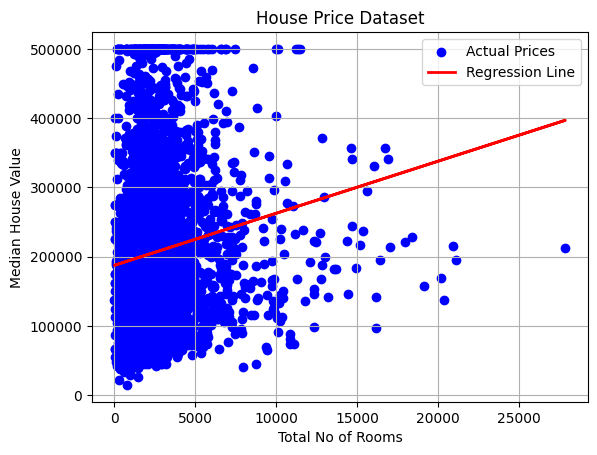

In [51]:
#plot REGRESSION LINE
plt.scatter(X_te, y_te, color='blue',label='Actual Prices')
plt.plot(X_te, y_predlinear , color='red', label='Regression Line', linewidth=2)
plt.title('House Price Dataset')
plt.xlabel('Total No of Rooms')
plt.ylabel('Median House Value')
plt.legend()
plt.grid()
plt.show()

In [ ]:
##TASK 2 : : :

In [58]:
#a)
features = ['total_rooms', 'total_bedrooms', 'population', 'median_income']
room_feature= housing_df[features].dropna()
target_price = housing_df['median_house_value'][X.index]  # align y with X

In [64]:
# Train model and Predict the Values
X_tr, X_te, y_tr, y_te = train_test_split(room_feature,target_price, test_size=0.2, random_state=42)
linreg = LinearRegression()
linreg.fit(X_tr, y_tr)
y_pred = linreg.predict(X_te)
print("Total Rooms  |  Total Bedrooms  |  Population  |  Median Income   |  Actulal Y  |  Predicted Y")
print("-------------------------------------------------------------------------------------------------")
for i in range(len(X_te)):
    x_values = "            ".join(map(str, X_te.iloc[i].values))
    print(f"{x_values}            {y_pred[i]:.2f}      {y_te.iloc[i]:.2f}")

Total Rooms  |  Total Bedrooms  |  Population  |  Median Income   |  Actulal Y  |  Predicted Y
-------------------------------------------------------------------------------------------------
961.0            278.0            525.0            3.1838            187839.29      245800.00
6403.0            1116.0            3327.0            4.4871            206213.73      137900.00
3731.0            853.0            2313.0            3.2237            187460.23      218200.00
1260.0            276.0            707.0            2.892            161285.47      220800.00
2171.0            597.0            928.0            4.1016            253584.12      170500.00
855.0            189.0            716.0            2.0375            113340.23      75000.00
3075.0            564.0            1633.0            5.2528            261655.74      269400.00
2228.0            399.0            1159.0            4.8906            245305.10      228900.00
2471.0            349.0            881.0      

In [65]:
#Evaluate
r2 = r2_score(y_te, y_pred)
mse = mean_squared_error(y_te, y_pred)
rmse = np.sqrt(mse)
print("Evaluation Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

Evaluation Metrics:
R² Score: 0.5243
MSE: 6505051255.1584
RMSE: 80653.8980


In [67]:
#Display Coefficients of each Feature
for i in range(len(features)):
    print(f"{features[i]}: {linreg.coef_[i]:.2f}")

total_rooms: -25.55
total_bedrooms: 196.49
population: -24.89
median_income: 47949.83


In [ ]:
#TASK 3 : : : 

In [102]:
X_tr1, X_te1, y_tr, y_te = train_test_split(room_feature, target_price, train_size=0.8)
linreg1 = LinearRegression()
linreg1.fit(X_tr1, y_tr)                      
y_pred1 = linreg1.predict(X_te1)

# Standardize features
scaler = StandardScaler()
x2 = scaler.fit_transform(room_feature)       
X_tr2, X_te2, y_tr, y_te = train_test_split(x2, target_price, train_size=0.8) 
linreg2 = LinearRegression()
linreg2.fit(X_tr2, y_tr2)                     
y_pred2 = linreg2.predict(X_te2)

In [103]:
# Compare performance
def evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

print("Before Scaling:")
evaluate(y_te, y_pred1)
print("\nAfter Scaling")
evaluate(y_te, y_pred2)

Before Scaling:
R² Score: -0.4759
MSE: 19672761619.03
RMSE: 140259.62

After Scaling
R² Score: 0.0072
MSE: 13233667514.86
RMSE: 115037.68


In [ ]:
##TASK 4 : :

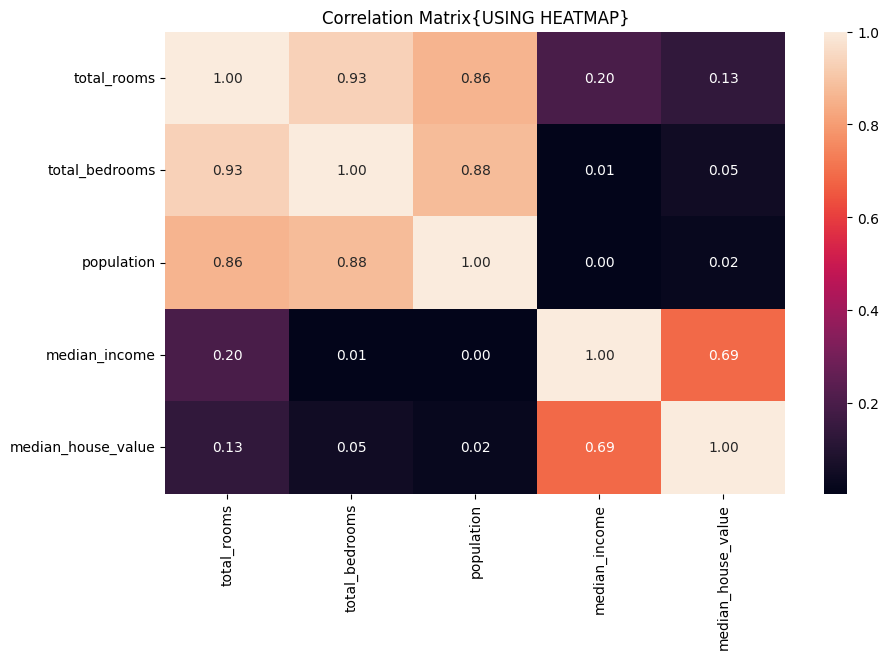

In [99]:
# a) 
matrix = housing_df[features + ['median_house_value']].corr().abs()
plt.figure(figsize=(10, 6))
sns.heatmap(matrix,annot=True,fmt='.2f')
plt.title("Correlation Matrix{USING HEATMAP}")
plt.show()

In [100]:
# b) 
corr =matrix['median_house_value'].drop('median_house_value').sort_values(ascending=False)
print("Correlation with Target (median_house_value):")
print(corr)

Correlation with Target (median_house_value):
median_income     0.688075
total_rooms       0.134153
total_bedrooms    0.049686
population        0.024650
Name: median_house_value, dtype: float64


In [101]:
# c) 
X_const = add_constant(X) 
print("Variance Inflation Factor (VIF):")
for i in range(1, X_const.shape[1]): 
    vif = variance_inflation_factor(X_const.values, i)
    print(f"{X_const.columns[i]}: {vif:.2f}")

Variance Inflation Factor (VIF):
total_rooms: 11.63
total_bedrooms: 11.54
population: 4.68
median_income: 1.48
